In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
# Load the aggregated metrics CSV
agg = pd.read_csv("classification_metrics.csv")

# Filter to RidgeWalker model
ridge = agg[agg["model"] == "RidgeWalker"].set_index("group")

# Display full RidgeWalker metrics
display(ridge[["tp", "fp", "fn", "tn", "precision", "recall", "f1", "accuracy"]])

,tp,fp,fn,tn,precision,recall,f1,accuracy
group,,,,,,,,
Variant - Two clearly separated peaks,0,0,0,10,1.00,1.0,1.00,1.00
Variant - Strong overlap between two peaks,5,0,0,0,1.00,1.0,1.00,1.00
"Variant - Four peaks: 2 overlap, 2 isolated",5,2,0,8,0.71,1.0,0.83,0.87
Variant - Cluster of 3 overlapping peaks,5,0,0,0,1.00,1.0,1.00,1.00
Variant - Close but not overlapping peaks,0,0,0,10,1.00,1.0,1.00,1.00
Variant - Intense + weak overlap,3,1,2,4,0.75,0.6,0.67,0.70
"Variant - Five peaks: 3 spaced, 2 overlapping",0,5,5,10,0.00,0.0,0.00,0.50


In [4]:
confusion = ridge[["tp", "fp", "fn", "tn"]]
print("RidgeWalker Confusion Matrix by Variant Group")
display(confusion)

RidgeWalker Confusion Matrix by Variant Group


,tp,fp,fn,tn
group,,,,
Variant - Two clearly separated peaks,0,0,0,10
Variant - Strong overlap between two peaks,5,0,0,0
"Variant - Four peaks: 2 overlap, 2 isolated",5,2,0,8
Variant - Cluster of 3 overlapping peaks,5,0,0,0
Variant - Close but not overlapping peaks,0,0,0,10
Variant - Intense + weak overlap,3,1,2,4
"Variant - Five peaks: 3 spaced, 2 overlapping",0,5,5,10


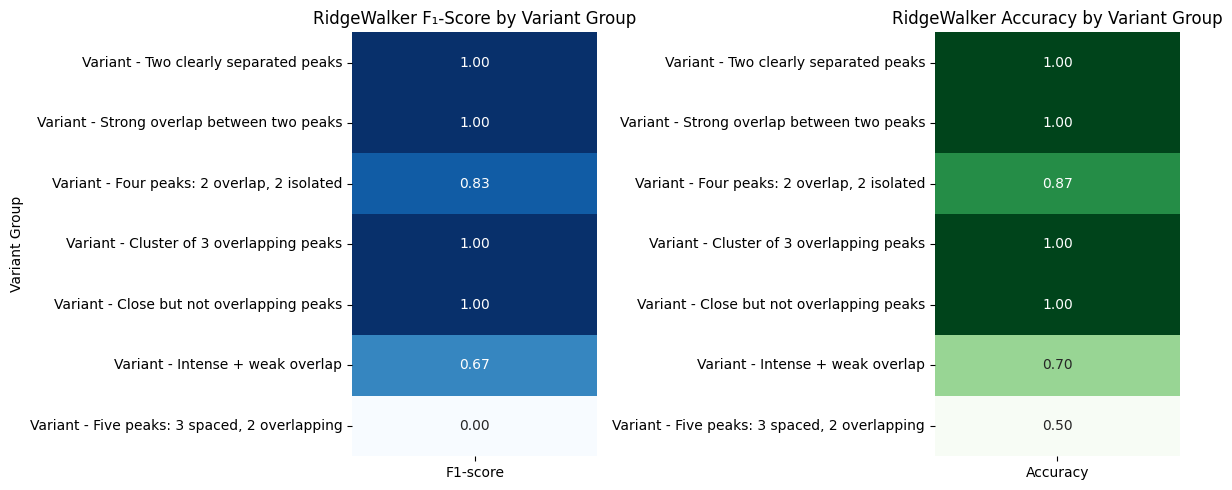

In [5]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# F1‐score heatmap
sns.heatmap(
    ridge[["f1"]].rename(columns={"f1": "F1-score"}),
    annot=True, fmt=".2f", cmap="Blues", cbar=False, ax=ax1
)
ax1.set_title("RidgeWalker F₁-Score by Variant Group")
ax1.set_xlabel("")
ax1.set_ylabel("Variant Group")

# Accuracy heatmap
sns.heatmap(
    ridge[["accuracy"]].rename(columns={"accuracy": "Accuracy"}),
    annot=True, fmt=".2f", cmap="Greens", cbar=False, ax=ax2
)
ax2.set_title("RidgeWalker Accuracy by Variant Group")
ax2.set_xlabel("")
ax2.set_ylabel("")

plt.tight_layout()
plt.show()



In [6]:
region = pd.read_csv("per_region_results.csv")

# Filter to RidgeWalker
ridge_pc = region[(region["model"] == "RidgeWalker") & region["count_error"].notna()]

C:\Users\victo\AppData\Local\Temp\ipykernel_10032\2414274461.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  ax = sns.barplot(
c:\Users\victo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


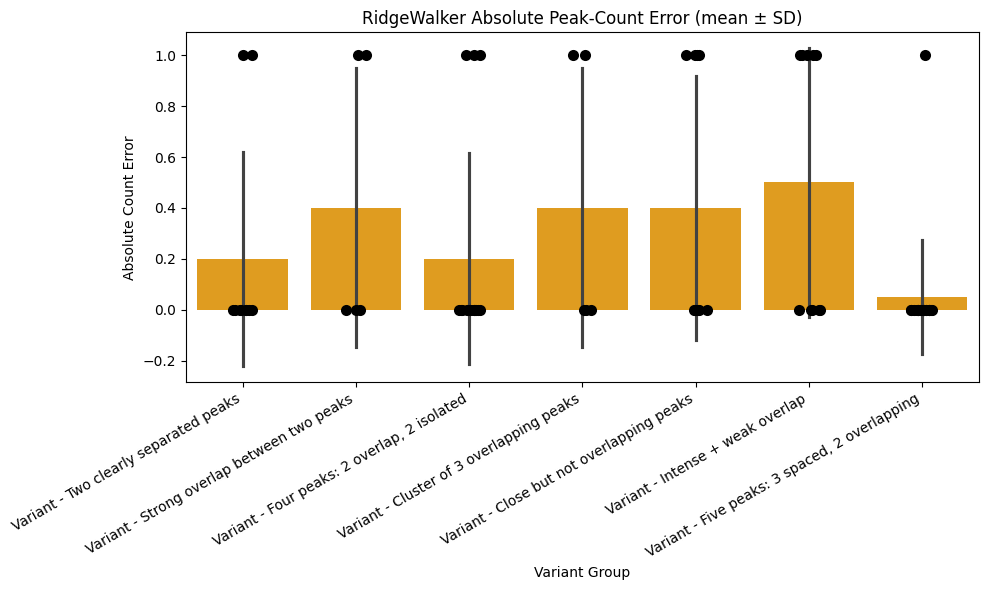

In [7]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=ridge_pc,
    x="group",
    y="count_error",
    ci="sd",
    color="orange"
)
sns.stripplot(
    data=ridge_pc,
    x="group",
    y="count_error",
    color="black",
    size=8,
    jitter=True
)
ax.set_title("RidgeWalker Absolute Peak‑Count Error (mean ± SD)")
ax.set_xlabel("Variant Group")
ax.set_ylabel("Absolute Count Error")
plt.xticks(rotation=30, ha="right")
plt.tight_layout()
plt.show()


In [9]:
region.head()
region["group"] = region["group"].str.replace(r"^Variant -\s*", "", regex=True)
region["label"] = region["label"].str.replace(r"^Variant -\s*", "", regex=True)
ridge_le_mz = region[(region["model"] == "RidgeWalker") & region["mean_loc_error_mz"].notna()]
ridge_le_rt = region[(region["model"] == "RidgeWalker") & region["mean_loc_error_rt"].notna()]

C:\Users\victo\AppData\Local\Temp\ipykernel_10032\3162460377.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(
c:\Users\victo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\victo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\victo\AppData\Local\Programs\Python\Python3

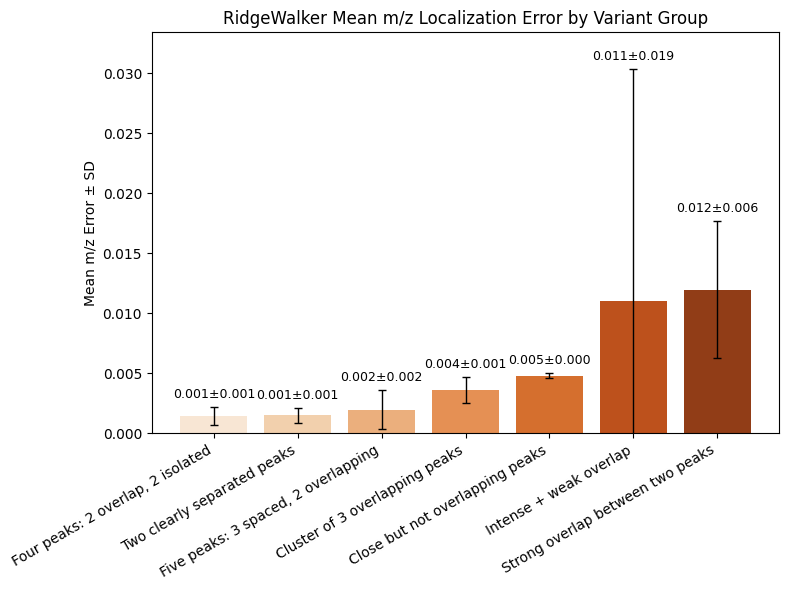

In [11]:
# Compute group-wise mean and std of m/z localization error
summary_le_mz = ridge_le_mz.groupby("group")["mean_loc_error_mz"].agg(["mean", "std"]).sort_values("mean")
order_le_mz = summary_le_mz.index.tolist()

# Create barplot
plt.figure(figsize=(8, 6))
ax = sns.barplot(
    data=summary_le_mz.reset_index(),
    x="group",
    y="mean",
    order=order_le_mz,
    palette="Oranges"
)

# Add error bars and value labels
for i, (_, row) in enumerate(summary_le_mz.iterrows()):
    ax.errorbar(
        i, row["mean"],
        yerr=row["std"],
        color="k",
        capsize=3,
        lw=1
    )
    ax.text(
        i, row["mean"] + row["std"] + 0.0005,
        f"{row['mean']:.3f}±{row['std']:.3f}",
        ha="center", va="bottom", fontsize=9
    )

# Final plot formatting
ymax = (summary_le_mz["mean"] + summary_le_mz["std"]).max() * 1.10
ax.set_ylim(0, ymax)
ax.set_xlabel("")
plt.title("RidgeWalker Mean m/z Localization Error by Variant Group")
plt.ylabel("Mean m/z Error ± SD")
plt.xticks(rotation=30, ha="right")
plt.tight_layout()
plt.show()



C:\Users\victo\AppData\Local\Temp\ipykernel_10032\2830320109.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(
c:\Users\victo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\victo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\victo\AppData\Local\Programs\Python\Python3

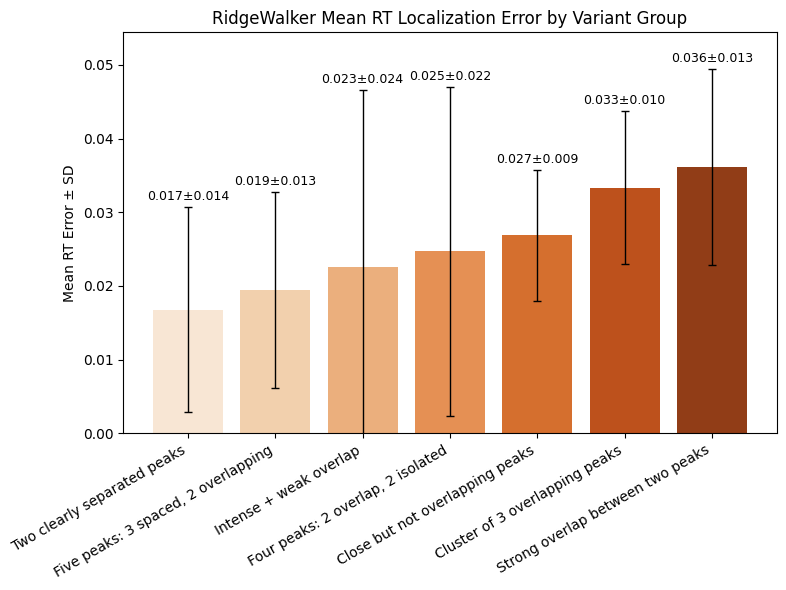

In [12]:
# Compute group-wise mean and std of m/z localization error
summary_le_rt = ridge_le_rt.groupby("group")["mean_loc_error_rt"].agg(["mean", "std"]).sort_values("mean")
order_le_rt = summary_le_rt.index.tolist()

# Create barplot
plt.figure(figsize=(8, 6))
ax = sns.barplot(
    data=summary_le_rt.reset_index(),
    x="group",
    y="mean",
    order=order_le_rt,
    palette="Oranges"
)

# Add error bars and value labels
for i, (_, row) in enumerate(summary_le_rt.iterrows()):
    ax.errorbar(
        i, row["mean"],
        yerr=row["std"],
        color="k",
        capsize=3,
        lw=1
    )
    ax.text(
        i, row["mean"] + row["std"] + 0.0005,
        f"{row['mean']:.3f}±{row['std']:.3f}",
        ha="center", va="bottom", fontsize=9
    )

# Final plot formatting
ymax = (summary_le_rt["mean"] + summary_le_rt["std"]).max() * 1.10
ax.set_ylim(0, ymax)
ax.set_xlabel("")
plt.title("RidgeWalker Mean RT Localization Error by Variant Group")
plt.ylabel("Mean RT Error ± SD")
plt.xticks(rotation=30, ha="right")
plt.tight_layout()
plt.show()

c:\Users\victo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


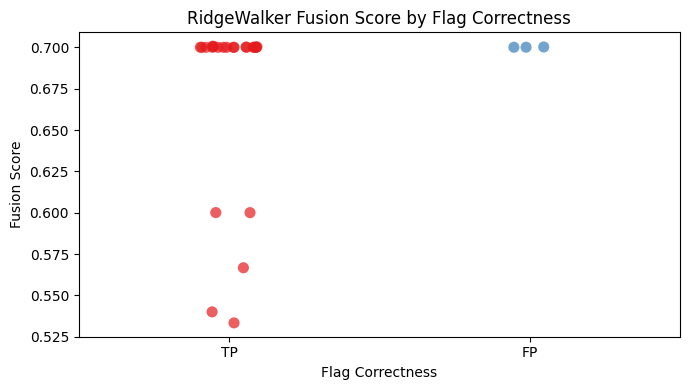

                                             group  \
31      Variant - Strong overlap between two peaks   
34      Variant - Strong overlap between two peaks   
37      Variant - Strong overlap between two peaks   
40      Variant - Strong overlap between two peaks   
43      Variant - Strong overlap between two peaks   
48     Variant - Four peaks: 2 overlap, 2 isolated   
49     Variant - Four peaks: 2 overlap, 2 isolated   
57     Variant - Four peaks: 2 overlap, 2 isolated   
59     Variant - Four peaks: 2 overlap, 2 isolated   
66     Variant - Four peaks: 2 overlap, 2 isolated   
75     Variant - Four peaks: 2 overlap, 2 isolated   
84     Variant - Four peaks: 2 overlap, 2 isolated   
91        Variant - Cluster of 3 overlapping peaks   
94        Variant - Cluster of 3 overlapping peaks   
97        Variant - Cluster of 3 overlapping peaks   
100       Variant - Cluster of 3 overlapping peaks   
103       Variant - Cluster of 3 overlapping peaks   
137               Variant - 

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7, 4))
sns.stripplot(data=rw, x="correctness", y="fusion_score", jitter=True, hue="correctness", palette="Set1", dodge=False, size=8, alpha=0.7)
plt.title("RidgeWalker Fusion Score by Flag Correctness")
plt.xlabel("Flag Correctness")
plt.ylabel("Fusion Score")
plt.legend([],[], frameon=False)
plt.show()

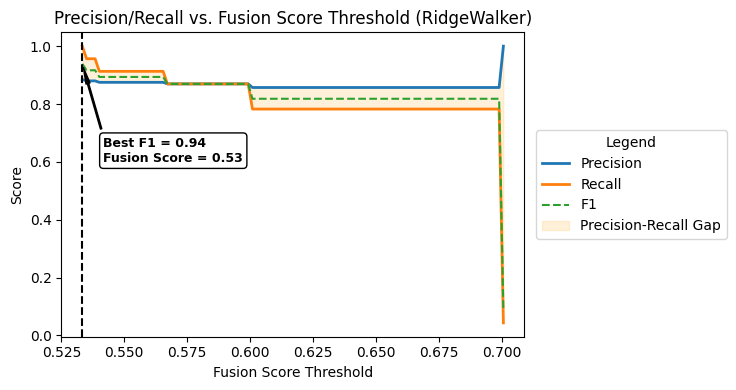

Best F1 = 0.94 at Fusion Score threshold 0.53


In [16]:
# Load your region-level results
region = pd.read_csv("per_region_results.csv")

# Filter to RidgeWalker entries with valid fusion scores
rw_all = region[(region["model"] == "RidgeWalker") & (region["fusion_score"].notna())]

thresholds = np.linspace(rw_all['fusion_score'].min(), rw_all['fusion_score'].max(), 100)
precision, recall, f1 = [], [], []

# Evaluate precision, recall, and F1 at each threshold
for t in thresholds:
    pred = (rw_all['fusion_score'] >= t)
    tp = ((pred) & (rw_all['overlap_true'])).sum()
    fp = ((pred) & (~rw_all['overlap_true'])).sum()
    fn = ((~pred) & (rw_all['overlap_true'])).sum()
    prec = tp / (tp + fp) if (tp + fp) > 0 else np.nan
    rec = tp / (tp + fn) if (tp + fn) > 0 else np.nan
    precision.append(prec)
    recall.append(rec)
    f1.append(2 * prec * rec / (prec + rec) if prec + rec > 0 else np.nan)

# Convert results to arrays for indexing
precision = np.array(precision)
recall = np.array(recall)
f1 = np.array(f1)

# Identify best threshold based on max F1 score
best_idx = np.nanargmax(f1)
best_t = thresholds[best_idx]

# Plot precision, recall, and F1 as functions of threshold
plt.figure(figsize=(10, 4))
plt.plot(thresholds, precision, label='Precision', lw=2)
plt.plot(thresholds, recall, label='Recall', lw=2)
plt.plot(thresholds, f1, label='F1', linestyle="--", lw=1.5)

# Fill area between precision and recall curves
plt.fill_between(thresholds, precision, recall, color='orange', alpha=0.15, label='Precision-Recall Gap')

# Mark and annotate the best threshold
plt.axvline(x=best_t, color='k', linestyle='dashed')
plt.annotate(
    f"Best F1 = {f1[best_idx]:.2f}\nFusion Score = {best_t:.2f}",
    xy=(best_t, f1[best_idx]),
    xytext=(best_t + (thresholds.max()-thresholds.min())*0.05, f1[best_idx] - 0.3),
    arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=3),
    fontsize=9,
    ha='left', va='center', weight='bold', color='black',
    bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="black", lw=1,)
)

# Final plot formatting
plt.xlabel("Fusion Score Threshold")
plt.ylabel("Score")
plt.title("Precision/Recall vs. Fusion Score Threshold (RidgeWalker)")
plt.legend(
    loc='center left',
    bbox_to_anchor=(1.01, 0.5),
    frameon=True,
    title='Legend'
)
plt.tight_layout(rect=[0,0,0.75,1])
plt.show()

print(f"Best F1 = {f1[best_idx]:.2f} at Fusion Score threshold {best_t:.2f}")




In [17]:
# Strip prefix from group name
agg["base_group"] = agg["group"].str.replace(r"^Variant -\s*", "", regex=True)

# Map base group to scenario class
scenario_map = {
    "Two clearly separated peaks":        "Fully Separated",
    "Close but not overlapping peaks":     "Fully Separated",
    "Cluster of 3 overlapping peaks":      "Weakly Overlapping",
    "Four peaks: 2 overlap, 2 isolated":  "Weakly Overlapping",
    "Strong overlap between two peaks":    "Strongly Overlapping",
    "Intense + weak overlap":             "Asymmetric",
    "Five peaks: 3 spaced, 2 overlapping": "Near-Duplicates"
}
agg["scenario_class"] = agg["base_group"].map(scenario_map)

# Filter for GMM model
rw_agg = agg[agg["model"] == "RidgeWalker"]

# Aggregate metrics by scenario
tbl = (
    rw_agg
    .groupby("scenario_class")
    .agg({
        "tp":       "sum",
        "fp":       "sum",
        "fn":       "sum",
        "tn":       "sum",
        "f1":       "mean",
        "accuracy": "mean"
    })
    .reset_index()
)

# Round metric values
tbl["f1"] = tbl["f1"].round(2)
tbl["accuracy"] = tbl["accuracy"].round(2)

# Reorder rows
order = [
    "Fully Separated",
    "Weakly Overlapping",
    "Strongly Overlapping",
    "Asymmetric",
    "Near-Duplicates"
]
tbl = tbl.set_index("scenario_class").loc[order].reset_index()

# Show table
tbl

,scenario_class,tp,fp,fn,tn,f1,accuracy
0,Fully Separated,0,0,0,20,1.00,1.00
1,Weakly Overlapping,10,2,0,8,0.92,0.94
2,Strongly Overlapping,5,0,0,0,1.00,1.00
3,Asymmetric,3,1,2,4,0.67,0.70
4,Near-Duplicates,0,5,5,10,0.00,0.50


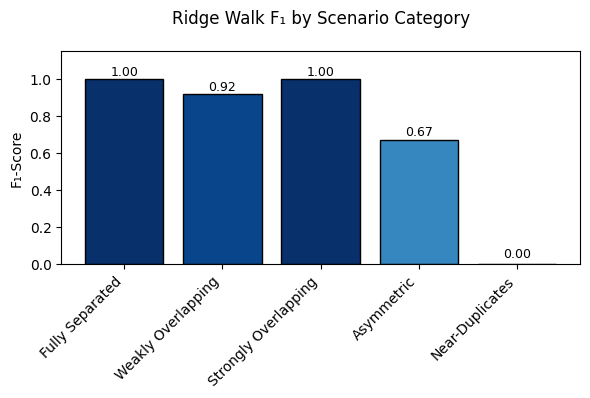

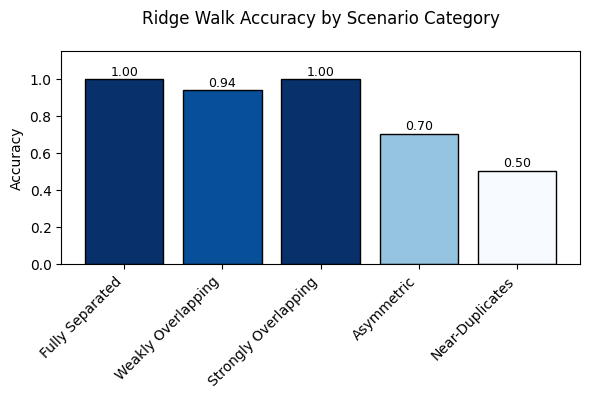

In [ ]:
import matplotlib as mpl

# Prepare values and colormap
vals = tbl["f1"].values
norm = mpl.colors.Normalize(vmin=vals.min(), vmax=vals.max())
cmap = mpl.cm.Blues

plt.figure(figsize=(6, 4))
bars = plt.bar(
    tbl["scenario_class"],
    vals,
    color=cmap(norm(vals)),
    edgecolor="black"
)

# Extend y‐axis to make room for annotations
ymax = vals.max() * 1.15
plt.ylim(0, ymax)

plt.title("Ridge Walk F₁ by Scenario Category", pad=20)
plt.ylabel("F₁-Score")
plt.xlabel("")
plt.xticks(rotation=45, ha="right")

# Annotate bar values
for bar, h in zip(bars, vals):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        h + (ymax - h) * 0.02,
        f"{h:.2f}",
        ha="center",
        va="bottom",
        fontsize=9
    )

plt.tight_layout()
plt.subplots_adjust(top=0.88)
plt.show()
 
# Color‐mapped, annotated GMM Accuracy by Scenario Category

acc_vals = tbl["accuracy"].values
norm_acc = mpl.colors.Normalize(vmin=acc_vals.min(), vmax=acc_vals.max())
cmap_acc = mpl.cm.Blues

plt.figure(figsize=(6, 4))
bars = plt.bar(
    tbl["scenario_class"],
    acc_vals,
    color=cmap_acc(norm_acc(acc_vals)),
    edgecolor="black"
)

ymax_acc = acc_vals.max() * 1.15
plt.ylim(0, ymax_acc)

plt.title("Ridge Walk Accuracy by Scenario Category", pad=20)
plt.ylabel("Accuracy")
plt.xlabel("")
plt.xticks(rotation=45, ha="right")

for bar, h in zip(bars, acc_vals):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        h + (ymax_acc - h) * 0.02,
        f"{h:.2f}",
        ha="center",
        va="bottom",
        fontsize=9
    )

plt.tight_layout()
plt.subplots_adjust(top=0.88)
plt.show()